# Assignment 5: Introduction to Pytorch
## PyTorch

**PyTorch** is an open-source machine learning library for Python that is widely used for developing and training deep learning models.

PyTorch provides two main features:

1.  An n-dimensional **Tensor**, similar to NumPy but can run on GPUs.
2.  Automatic differentiation for building and training neural networks.

TODO: How many late days are you using for this assignment?
Ans: 0

## Section 1: PyTorch Tensors

- These next few code blocks introduce PyTorch tensors, covering their creation from lists and NumPy arrays, initialization with random values, ones, and zeros, and key attributes like shape, datatype, and device placement.
- Please fill out the None values in the following cells with the appropriate functions

### Section 1.1 Creating Tensors

##### Creating a Tensor from a List  
PyTorch tensors are core to working with data and building models in PyTorch. They are important as they provide the foundation for efficient computation, especially for deep learning tasks. PyTorch tensors can be muti-dimensional and can be easily moved between GPU and CPU. To begin working with PyTorch, we will start by creating tensors.

This cell imports the PyTorch library and initializes a 2D list. It includes a TODO to create a tensor from the list using `torch.tensor(data)`, but the assignment to `x_data` is currently set to `None`. The cell is intended to demonstrate creating a tensor from a Python list.  

In the following section please update the **None** values with your answer

In [1]:
# Import the PyTorch library
import torch
# ### Creating Tensors
data = [[1, 2], [3, 4]]
# TODO: Create a tensor from a list and output the tensor
x_data = torch.tensor(data)
print(f"Tensor from list:\n {x_data} \n")

Tensor from list:
 tensor([[1, 2],
        [3, 4]]) 



##### Creating a Tensor from a NumPy Array  
Pytorch provides an easy way to convert NumPy objects to PyTorch Tensors. We will explore this in the cell below.

In [2]:

import numpy as np
np_array = np.array(data)
# TODO: Create a tensor from a NumPy array
x_np = torch.from_numpy(np_array)
print(f"Tensor from NumPy array:\n {x_np} \n")

# TODO: Convert the tensor back to a NumPy array
x_np_back = x_np.numpy()
print(f"NumPy array from tensor:\n {x_np_back} \n")

Tensor from NumPy array:
 tensor([[1, 2],
        [3, 4]]) 

NumPy array from tensor:
 [[1 2]
 [3 4]] 



##### Creating Tensors with Specific Values  
This cell includes TODOs for creating tensors with specific properties:  
- `x_ones`: A tensor of the same shape as `x_data`, filled with ones, retaining its properties.  
- `x_rand`: A tensor of the same shape as `x_data`, filled with random values between 0 and 1, overriding its datatype.  
- `rand_tensor`: A randomly initialized tensor with a specified shape `(2,3)`.  
- `ones_tensor`: A tensor of shape `(2,3)` filled with ones.  
- `zeros_tensor`: A tensor of shape `(2,3)` filled with zeros.  

##### Tensor Attributes  
The last part of this cell creates a random tensor of shape `(3,4)` and prints its attributes: shape, datatype, and the device it is stored on.  


In [3]:
# TODO: Create a tensor of same dimensions as x_data with ones in place
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

#TODO: Creates a tensor of same dimensions as x_data with random values between 0 and 1
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

# Create a tensor with specified shape
shape = (2,3)

# TODO: Fill out the following None values
rand_tensor = torch.rand(shape)        # A tensor of shape (2,3) with random values
ones_tensor = torch.ones(shape)        # A tensor of shape (2,3) with ones
zeros_tensor = torch.zeros(shape)      # A tensor of shape (2,3) with zeros

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

print()
#### Tensor Attributes
tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4931, 0.9397],
        [0.2389, 0.3784]]) 

Random Tensor: 
 tensor([[0.6914, 0.7416, 0.9328],
        [0.6985, 0.5679, 0.7611]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Section 1.2 Moving Tensors from CPU to GPU
One great benefit of PyTorch is that it enables us to easily use GPUs. In deep learning, we often use very large tensors with parallelizable operations. The architecture of GPU can accelerate these operation, allowing more efficient learning. In this section, we will learn how to move tensors to GPU.  This section has no TODOs and is for your information.

Note: This code block will give different outputs depending on your access to a GPU.

The cell output displays what output you would get if you run this cell using a GPU.

In [4]:
# The output of this cell will be different depending on if your machine has access to a GPU
# Observe what happens when running it in your current enviornment

if torch.cuda.is_available():
    device = torch.device("cuda")          # Use the first available GPU
    print("GPU is available!")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU.")
print()

if torch.cuda.is_available():
  tensor = torch.rand(3,4)
  print(f"Device tensor is stored on: {tensor.device}") #By default, device is cpu
  print('You are not using GPU yet!')
  print()
  tensor = tensor.to(device)
  print(f"Device tensor is stored on: {tensor.device}")
  print('Congrats, you are using GPU!')
print()

# Common Error
if torch.cuda.is_available():
    try:
        y_cpu = torch.randn(3,4)
        result = tensor + y_cpu # Error! Tensors on different devices
    except RuntimeError as e:
        print("Error:", e)
        print("Remember: Move both tensors to the same device to perform operations.")

GPU is not available, using CPU.




### Section 1.3 Tensor Operations

Tensor operations in PyTorch include a variety of element-wise and matrix operations such as addition, subtraction, multiplication, and division. Common operations include:  

- **Element-wise Operations**: Addition (`+`), subtraction (`-`), multiplication (`*`), and division (`/`).  
- **Matrix Operations**: Matrix multiplication (`torch.matmul()` or `@` operator), transposition (`tensor.T`), and inversion.  
- **Reduction Operations**: Summation (`torch.sum()`), mean (`torch.mean()`), max/min (`torch.max()` / `torch.min()`).  
- **Reshaping**: Changing tensor dimensions using `torch.reshape()`, `torch.view()`, or `torch.permute()`.  
- **Concatenation and Stacking**: `torch.cat()` for joining along a dimension, `torch.stack()` for stacking along a new dimension.  
- **In-place Operations**: Operations ending in `_` (e.g., `tensor.add_()`) modify the tensor directly.  

### TODO: In the following section please update the **None** values with your answer in the subsequent codeblocks

In [5]:
# ### Tensor Operations

# TODO: Standard numpy-like indexing and slicing:
tensor = torch.ones(4, 4)

# TODO: print the first row of the tensor
first_row = tensor[0]
print('First row: ', first_row)

# TODO: print the first column of the tensor
first_column = tensor[:, 0]
print('First column: ', first_column)

# TODO: print the first column of the tensor
last_column = tensor[:, -1]
print('Last column:', last_column)

# TODO: Update the tensor so that index 1 column is all zeros and print the tensor
tensor[:, 1] = 0
print('Updated tensor:', tensor )

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
Updated tensor: tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [6]:
# Reduction Operations

tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Summation
tensor_sum = torch.sum(tensor) # TODO: Compute Sum of all elements in tensor
print(f"Sum: {tensor_sum}")

# Mean
tensor_mean = torch.mean(tensor.float())  # TODO: Compute mean of all elements in tensor. Note: Use .float() for mean
print(f"Mean: {tensor_mean}")

# Max/Min
tensor_max = torch.max(tensor) # TODO: Find Max element in tensor
tensor_min = torch.min(tensor) # TODO: Find Min element in tensor
print(f"Max: {tensor_max}")
print(f"Min: {tensor_min}")


Sum: 21
Mean: 3.5
Max: 6
Min: 1


In [7]:
# Reshaping

x = torch.randn(4, 4)
print("Original tensor shape:", x.shape)
y = x.view(-1)  # TODO: Reshape to a 1D tensor
print("Reshaped tensor shape:", y.shape)

z = x.view(2, 8)  # TODO: Reshape to a 2x8 tensor
print("Reshaped tensor shape:", z.shape)


# Permute (reorders dimensions)
x = torch.randn(2, 3, 4)
x_perm = x.permute(2, 0, 1) # TODO: Swap dimensions in order 2, 0, 1
print("Original tensor shape:", x.shape)
print("Permuted tensor shape:", x_perm.shape)


Original tensor shape: torch.Size([4, 4])
Reshaped tensor shape: torch.Size([16])
Reshaped tensor shape: torch.Size([2, 8])
Original tensor shape: torch.Size([2, 3, 4])
Permuted tensor shape: torch.Size([4, 2, 3])


In [8]:
tensor_one = torch.rand(4, 4)
tensor_two = torch.rand(4, 4)
# TODO: Concatenate tensor_one and tensor_two row wise
row_concatenated_tensor = torch.cat((tensor_one, tensor_two), dim=0)
print('Row Concatenated Tensors:', row_concatenated_tensor)

# TODO: Concatenate tensor_one and tensor_two column wise
col_concatenated_tensor = torch.cat((tensor_one, tensor_two), dim=1)
print('Column Concatenated Tensors:', col_concatenated_tensor)

tensor_three = torch.rand(4, 4)
# TODO: Stack tensors one, two and three along the default dimension (dim=0)
stacked_tensor = torch.stack((tensor_one, tensor_two, tensor_three))

print(stacked_tensor)

Row Concatenated Tensors: tensor([[0.8044, 0.5604, 0.6205, 0.7005],
        [0.0639, 0.6574, 0.2682, 0.8794],
        [0.5498, 0.3874, 0.9864, 0.9959],
        [0.5169, 0.7226, 0.3739, 0.3882],
        [0.1452, 0.9068, 0.5340, 0.6604],
        [0.0987, 0.7109, 0.7348, 0.7892],
        [0.6161, 0.4473, 0.6619, 0.0025],
        [0.4711, 0.6278, 0.4431, 0.7606]])
Column Concatenated Tensors: tensor([[0.8044, 0.5604, 0.6205, 0.7005, 0.1452, 0.9068, 0.5340, 0.6604],
        [0.0639, 0.6574, 0.2682, 0.8794, 0.0987, 0.7109, 0.7348, 0.7892],
        [0.5498, 0.3874, 0.9864, 0.9959, 0.6161, 0.4473, 0.6619, 0.0025],
        [0.5169, 0.7226, 0.3739, 0.3882, 0.4711, 0.6278, 0.4431, 0.7606]])
tensor([[[0.8044, 0.5604, 0.6205, 0.7005],
         [0.0639, 0.6574, 0.2682, 0.8794],
         [0.5498, 0.3874, 0.9864, 0.9959],
         [0.5169, 0.7226, 0.3739, 0.3882]],

        [[0.1452, 0.9068, 0.5340, 0.6604],
         [0.0987, 0.7109, 0.7348, 0.7892],
         [0.6161, 0.4473, 0.6619, 0.0025],
        

In [9]:
#In-place operations
tensor = torch.ones(4, 4)
print()
print('In-place operations')
print(tensor, "\n")

tensor = torch.ones(4,4)
# TODO: Add 5 to all values of the
tensor.add_(5)
print('Added five to  all values of tensor', tensor)

# TODO: Subtract 5 to all values of the
tensor.sub_(5)
print('Subtract five to  all values of tensor', tensor)


In-place operations
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Added five to  all values of tensor tensor([[6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])
Subtract five to  all values of tensor tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [10]:
# Multiplying tensors

# TODO: Given two tensors, do an element wise multiplication
# Hint: There is more than one way to do this
tensor_one = torch.rand(4, 4)
tensor_two = torch.rand(4, 4)

element_wise_tensor = tensor_one * tensor_two
print("Element wise multiplication:", element_wise_tensor)
print()

# TODO: Compute the dot product of the two tensors
# Hint: There is more than one way to do this
dot_product_tensor = torch.matmul(tensor_one, tensor_two)
print("Dot product tensor:", dot_product_tensor)
print()


Element wise multiplication: tensor([[0.1403, 0.5049, 0.2692, 0.0509],
        [0.4591, 0.2156, 0.0291, 0.1975],
        [0.4077, 0.0019, 0.1293, 0.1911],
        [0.8498, 0.2428, 0.5478, 0.4254]])

Dot product tensor: tensor([[1.1317, 0.5752, 0.7560, 1.0208],
        [1.2092, 1.0166, 0.6877, 0.7118],
        [1.7161, 1.0893, 1.0050, 1.1623],
        [1.9919, 1.2616, 1.2346, 1.4481]])



### Section 1.4 Broadcasting
Broadcasting in PyTorch is a useful feature that lets you perform operations on tensors of incompatible shapes without manually reshaping them. PyTorch automatically expands smaller tensors so their shapes are compatible for element-wise operations.

You can read the details of these rules here: https://pytorch.org/docs/stable/notes/broadcasting.html


 In general you never need broadcasting as you can always be explicit with your tensor shapes. At first, broadcasting can feel like arbitrary rules but as you write more PyTorch you'll start to find them convienent particularly when working with training batches.

 Below we show some examples of broadcasting.

In [11]:
# Broadcasting
import torch
# Example 1: Adding a scalar to a tensor
tensor = torch.tensor([[1, 2], [3, 4]])  # shape (2, 2)
scalar = torch.tensor(10)               # shape ()

result = tensor + scalar  # Broadcasting scalar to shape (2, 2)
# result: [[11, 12],
#          [13, 14]]
print(f"Broadcasting example 1:\n {result}\n")

# Example 2: Adding a vector to a matrix (1D + 2D Tensor)
a = torch.tensor([[1, 2], [3, 4]])  # shape (2, 2)
b = torch.tensor([10, 20])         # shape (2,)

result = a + b  # b is broadcast to shape (2, 2)
print(result)
# Output:
# tensor([[11, 22],
#         [13, 24]])
print(f"Broadcasting example 2:\n {result}\n")

# Example 3 — Column Vector + Matrix
a = torch.tensor([[1], [2], [3]])  # shape (3, 1)
b = torch.tensor([[10, 20, 30]])   # shape (1, 3)

result = a * b  # a broadcast to (3, 3), b broadcast to (3, 3)
print(f"Broadcasting example 3:\n {result}\n")
# Output:
# tensor([[10, 20, 30],
#         [20, 40, 60],
#         [30, 60, 90]])


Broadcasting example 1:
 tensor([[11, 12],
        [13, 14]])

tensor([[11, 22],
        [13, 24]])
Broadcasting example 2:
 tensor([[11, 22],
        [13, 24]])

Broadcasting example 3:
 tensor([[10, 20, 30],
        [20, 40, 60],
        [30, 60, 90]])



In [12]:
#Examples 4 - Mismatched Dimensions
#a = torch.ones((2, 3))
#b = torch.ones((3, 2))

#result = a + b
#print(f"Broadcasting example 4:\n {result}\n") # Will give a runtime error
#


### TODO: Please answer the following questions.

1) Predict the shape:

    a = torch.ones((3, 1))
    b = torch.ones((1, 4))
    result = a + b

Ans: (3, 4)

2) Predict the shape:

    a = torch.ones((2, 3))
    b = torch.ones((2, 1))
    result = a + b
Ans: (2, 3)

3) What is the output?

    a = torch.tensor([[1], [2], [3]])  # shape (3, 1)
    b = torch.tensor([10, 20])         # shape (2,)
    result = a + b

Ans: tensor([[11, 21], [12, 22], [13, 23]])

4) Will the following code run? Please explain why or why not.
    
    
    a = torch.ones((2, 2))
    b = torch.ones((3, 1))

    result = a + b

Ans: No, it is a runtime error because (2, 2) and (3, 1) are incompatible for
broadcasting. Since their outer dimensions differ, there is no way to align them. 


## Section 2: Automatic Differentiaion with Logistic Regression

In this section, we'll use logistic regression as an example to explain the entire flow of building and training a model. Logistic Regression was introduced in class, but we will now explore how it more detail. Specifically, we will build the model from scratch using PyTorch modules, and train it on our data using automatic differentiation. This process invloves implement implementing the model's forward pass, selecting the appropriate loss and optimizer components, and then writing a training loop to optimize the model relative to our dataset.

**Note: There are no TODOs for Section 2 but it is critical you read, run, and understand this code or in order to understand what you need for Section 3 and future assignments.**

### Iris Dataset

To train our logistic regression model we will use a classic machine learning dataset - the Iris dataset. It containes 150 instances of iris flowers categorized by three species: Setosa, Versicolor, and Virginica. Each flower is describes by four numerical features:


*   Sepal length (cm)
*   Sepal width (cm)
*   Petal length (cm)
*   Petal width (cm)

In [13]:
import math
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import requests
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

csv_path = "iris.csv"

### Section 2.1 `Dataset` and `DataLoader`

In deep learning, handling large datasets efficiently is crucial. During training, doing gradient calculations on an entire large dataset can be time consuming. So a better way to handle large datasets is to divide samples into smaller batches and do the calculations individually. PyTorch provides `Dataset` and `DataLoader` to streamline this process:

- **`Dataset` Class**: Helps organize and preprocess data by defining how to load samples. It enables transformations, label encoding, and normalization before passing data to a model.
- **`DataLoader` Class**: Manages batch loading, shuffling, and parallel processing, optimizing data feeding into the training loop.

This structured approach organizes your code, improves performance, and ensures smooth model training, especially for large datasets.

In [14]:
class IrisDataset(Dataset):
    def __init__(self, X, y):
        """
        Initialize the IrisDataset.

        Args:
            X (dtype -- numpy.ndarray): Features (sepal length, sepal width, petal length, petal width)
            y (dtype -- numpy.ndarray): Target (species)
        """
        # We first convert the features ad labels to pytorch tensors
        # We convert feature data (X) to float32 data type as PyTorch models (like nn.Linear) expect this format.
        # We convert target data (y) to int64 data type to ensure compatibility with PyTorch's loss functions.
        self.x = torch.from_numpy(X.astype(np.float32))
        self.y = torch.from_numpy(y.astype(np.int64))

        # Store the number of samples in the dataset
        self.n_samples = X.shape[0]

    def __getitem__(self, index):
        # Allows for indexing. For example, we can do dataset[0]
        return self.x[index], self.y[index]

    def __len__(self):
        # Allows us to call len(dataset)
        return self.n_samples

We will now load the dataset, preprocess it and create instances of the dataset.

In [15]:
# Define the column names for the dataset
column_names = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]

# Load the data from the CSV file (above cells) into a Pandas DataFrame
data = pd.read_csv(csv_path, names=column_names, header=0)

# Encode the species target (categorical data) into numerical values
# 0 -> Iris-setosa
# 1 -> Iris-setosa
# 2 -> Iris-virginica
label_encoder = LabelEncoder()
data["Species"] = label_encoder.fit_transform(data["Species"])

# Seperate out the columns into features (all columns except the last one) and target (the last column)
features = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]

# Split dataset into features (X) and target (y)
X = data[features].values  # Features
y = data["Species"].values   # Target
y = y.flatten() # This ensures that out targets are a 1D array -- our loss function will require this!

# Split dataset into training and testing sets using train_test_split -- We are using 20% of the samples as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (120, 4), Testing set: (30, 4)


In [16]:
# Create datasets
train_dataset = IrisDataset(X_train, y_train)
test_dataset = IrisDataset(X_test, y_test)

# Create DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=False)

### Section 2.2 Create a LogisticRegression Module

Logistic regression is a simple yet effective classification algorithm that applies a linear transformation to input features and uses a softmax activation to predict class probabilities. To help you get started, we are providing demo/sample code for a logistic regression implementation. This will give you a basic structure to build upon as you develop your understanding of logistic regression.

In this section, we will create a simple logistic regression class using PyTorch's nn.Linear layer.

In [17]:
import torch
import torch.nn as nn

# Logistic Regression Model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegression, self).__init__()
        # Define a single fully connected layer with a bias (linear transformation)
        # This maps input features (input_dim) to output classes (num_classes)
        self.linear = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        # Forward pass: Apply the linear transformation to input data
        # Note: We do not use an activation function here because
        # PyTorch's CrossEntropyLoss automatically applies softmax
        return self.linear(x)

### Section 2.3 Create Our Model and Components

Now that we have defined our logistic regression class, we need to train it on our dataset. PyTorch provides many pre-built implementations of common deep learning components to make this relatively easy to do. However, a lot is happening behind the scenes so let's break it down.

In [18]:
# Get the number of features and classes
input_dim = 4  # Number of features -- You can automatically determine from the data using `X_train.shape[1]`
num_classes = 3  # Number of categories in dataset -- You can automatically determine from the data using `len(np.unique(y))`

# Initialize model, loss function, and optimizer
model = LogisticRegression(input_dim, num_classes)  # Create an instance of our logistic regression model
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent optimizer with a learning rate of 0.01

# Let's see what model we initialized
print(model)  # This prints the structure of our model

LogisticRegression(
  (linear): Linear(in_features=4, out_features=3, bias=True)
)


Above, we initialize an instance of the logistic regression model we just created. We also define a loss/objective function to measure how well the model is performing and an optimizer to update the model's parameters based on gradients computed during backpropagation.

We use a PyTorch built-in for the loss function and optimizer which are similiar to the squared error loss and gradient descent alogirthms we discussed in lecture. Cross Entropy is a loss with better properties for classification and will make our training more smooth and consistent. While "Stochastic" Gradient Descent is the gradient descent we've seen but implies a single training datapoint is used instead of all the datapoints (more on this later). In practice, it's common to use these built-ins instead of writing them from scratch, but PyTorch makes it relatively easy to extend and define your own if you want to create a custom loss function or optimization algorithm. Notice how we take the `parameters()` of the model and provide them to our optimizer. This tells the optimization algorithm which tensors need to updated on each iteration of our training.

### Section 2.4 The Training Loop

**Note: If you've been skimming the prior sections be sure to slow down and understand this one in detail. This content is incredibly important and likely to show up on an exam.**

Now, we will see the power of PyTorch with *automatic differentiation.* In the background PyTorch tracks all of the operations performed on any tensor that you create and builds a computational graph which tracks the influence of each operation on downstream values. This tracking occurs *across* variable assignments so the graph is reflective of your entire program from input tensor to final output tensor. In deep learning, the final tensor is usually your computed loss for a subset (batch) of the training data. Then with a single call to the `backward()` routine **the entire backpropagation algorithm is run** to compute the gradients for the computation graph. Below, we put everything together: the model, training components, dataloader, etc. Read through the code and run it, then we will break it down.

A few terms will be helpful before we move forward:

* **epoch**: One complete forward and backward pass of all samples in the training set.

* **batch_size**: The number of training samples in a single forward and backward pass.

* **number of iterations**: The total number of passes, where each pass processes batch_size number of samples.

For example, if we have 100 samples and set `batch_size = 20`, then `100 / 20 = 5` iterations are needed for one complete epoch.

In [19]:
# Training loop
num_epochs = 100  # Number of times the entire dataset is passed through the model
for epoch in range(num_epochs):
    # We loop over train_loader to process batches efficiently
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass: Compute model predictions
        outputs = model(inputs)  # Pass inputs through the model
        loss = criterion(outputs, labels)  # Compute loss between predictions and actual labels

        # Backward pass and optimization
        optimizer.zero_grad()  # Reset gradients to zero before backpropagation
        loss.backward()  # Compute gradients of the loss with respect to model parameters
        optimizer.step()  # Update model parameters using computed gradients

    # Print loss every 10 epochs to monitor training progress
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')  # Print epoch number and current loss value

Epoch [10/100], Loss: 0.6924
Epoch [20/100], Loss: 0.4679
Epoch [30/100], Loss: 0.3282
Epoch [40/100], Loss: 0.4497
Epoch [50/100], Loss: 0.6465
Epoch [60/100], Loss: 0.3977
Epoch [70/100], Loss: 0.4993
Epoch [80/100], Loss: 0.2586
Epoch [90/100], Loss: 0.4750
Epoch [100/100], Loss: 0.3565


The first few lines are boilerplate which set up our training loop and call our `Dataloader` that we created earlier to get a *batch* of the data. In class, we showed how each iteration of gradient descent updated the model parameters for all the training datapoints. Often in practice, our machine does not have enough memory to do this (particularly for big models and large datasets). So we instead *estimate* the true gradient with a subset of the data (batch) and update our parameters incrementally. Confusingly, this is referred to as **mini-batch gradident descent** in contrast to using *all* training datapoints, which is **batch gradient descent.** There are theoretical implications of doing one versus the other which is why people distinguish, so to summarize:

| Term                       | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| Batch Gradient Descent     | Uses **all** training data to compute the gradient and update parameters.   |
| Mini-Batch Gradient Descent| Uses a **subset** (mini-batch) of the training data to estimate the gradient. |
| Stochastic Gradient Descent| Uses **one** training example at a time to estimate the gradient.           |

The next couple lines call our model on the training batch and compute the loss for this batch. The three lines that follow are crucial:

```python
optimizer.zero_grad()
loss.backward()
optimizer.step()
```
The first line does nothing on the first iteration, but on subsequent iterations clears out the gradients computed on the previous batch. The next line performs backpropagation to compute the gradients for the current batch which are accumulated on each of the models' individual parameters. In the next line the optimizer computes the updates for each of these parameters relative to the gradients and applies them to each parameter of our model (recall we connected them earlier when we initialized the optimizer).

In summary, the training process involves repeatedly passing the training data through the model, computing the loss, calculating gradients, and updating the model parameters. This training loop iterates over the dataset multiple times, adjusting the model's parameters to minimize the loss. By following this structure, you can train a logistic regression model to classify iris flowers based on their features. Each epoch represents a full pass through the dataset, and the optimizer updates the weights in a way that reduces the classification error over time. This iterative process helps the model learn the optimal weights for making predictions relative to the training data.

# Section 3: Creating a Multi-Layer Perceptron Using the Titanic dataset
In the previous sections, we reviewed the basics of PyTorch from creating tensors to creating a basic model. In this section, we will ask you to put it all together. We will ask you train a multi-layer perceptron to perform classification on the titanic dataset. We will ask you to do some data cleaning, create a model, train and test the model, do some experimentation and present the results.


## Titanic Dataset
The Titanic dataset is a dataset containing information of the passengers of the RMS Titanic, a British passanger ship which famously sunk upon hitting an iceberg. The dataset can be used for binary classification, predicting whether a passenger survived or not.  The dataset includes demographic, socio-economic, and onboard information such as:


- Survived (Target Variable): 0 = No, 1 = Yes
- Pclass (Passenger Class): 1st, 2nd, or 3rd class
- Sex: Male or Female
- Age: Passenger's age in years
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Fare: Ticket fare price
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv("titanic.csv")

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Section 3.1: Process data for modeling

In [22]:
# TODO : Handle missing values for "Age" and "Embarked"
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
# TODO: Encode categorical features "Sex" and "Embarked"
# Hint: Use LabelEncoder (check imports)
label_encoder_sex = LabelEncoder()
label_encoder_embarked = LabelEncoder()
df["Sex"] = label_encoder_sex.fit_transform(df["Sex"])
df["Embarked"] = label_encoder_embarked.fit_transform(df["Embarked"])
# TODO: Select features and target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = df[features].values
y = df["Survived"].values
# TODO: Normalize numerical features in X
# Hint: Use StandardScaler()
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (712, 7), Testing set: (179, 7)


### Section 3.2 Create a Dataset Class with the Previous Dataset

In [23]:
class TitanicDataset(Dataset):
    def __init__(self, X, y):
        # TODO: initialize X, y as tensors
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

# TODO: Instantiate the dataset classes
train_dataset = TitanicDataset(X_train, y_train)
test_dataset = TitanicDataset(X_test, y_test)

# TODO: Create Dataloaders using the datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


### Section 3.3 Create a MLP class
In this section we will create a multi-layer perceptron with the following specification.
We will have a total of three fully connected layers.


1.   Fully Connected Layer of size (7, 64) followed by ReLU
2.   Full Connected Layer of Size (64, 32) followed by ReLU
3. Full Connected Layer of Size (32, 1) followed by Sigmoid

In [24]:
class TitanicMLP(nn.Module):
    def __init__(self):
        super(TitanicMLP, self).__init__()
        # TODO: Define Layers
        self.model = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)
    
model = TitanicMLP()
print(model)

# TODO: Move the model to GPU if possible
# I have a mac, would be possible but requires quite a bit of additional setup


TitanicMLP(
  (model): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


### Section 3.4 : Writing a training and testing loops

Epoch [1/20], Loss: 0.6525
Epoch [2/20], Loss: 0.5731
Epoch [3/20], Loss: 0.5066
Epoch [4/20], Loss: 0.4468
Epoch [5/20], Loss: 0.4417
Epoch [6/20], Loss: 0.4217
Epoch [7/20], Loss: 0.4221
Epoch [8/20], Loss: 0.4269
Epoch [9/20], Loss: 0.4197
Epoch [10/20], Loss: 0.4082
Epoch [11/20], Loss: 0.4139
Epoch [12/20], Loss: 0.4048
Epoch [13/20], Loss: 0.4002
Epoch [14/20], Loss: 0.4000
Epoch [15/20], Loss: 0.4027
Epoch [16/20], Loss: 0.3849
Epoch [17/20], Loss: 0.3957
Epoch [18/20], Loss: 0.3887
Epoch [19/20], Loss: 0.3958
Epoch [20/20], Loss: 0.3841


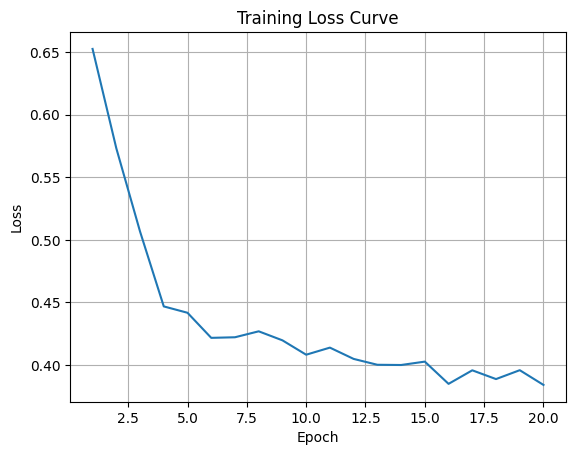

In [25]:
def train_model(train_loader, num_epochs, learning_rate):
  # we have provided the loss and optimizer below
  criterion = nn.BCELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  train_losses = []

  for epoch in range(num_epochs):
      total_loss = 0
      # TODO: Compute the Gradient and Loss by iterating train_loader
      for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device).unsqueeze(1)  # reshape to (batch_size, 1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
      avg_loss = total_loss / len(train_loader)
      train_losses.append(avg_loss)
      # TODO: Print and store loss at each epoch
      print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")
  return train_losses

num_epochs = 20
learning_rate = 0.001
train_losses = train_model(train_loader, num_epochs, learning_rate)

# TODO: Plot the Training Loss Curve by (Epoch # on x-axis and loss on y-axis)
plt.plot(range(1, num_epochs + 1), train_losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()



In [26]:
def test_model():
  correct = 0
  total = 0

  # When we are doing inference on a model, we do not need to keep track of gradients
  # torch.no_grad() indicates to pytorch to not store gradients for more efficent inference
  with torch.no_grad():  # No gradient tracking for evaluation
    # TODO: Iterate through test_loader and perform a forward pass to compute predictions
    for inputs, labels in test_loader:
      inputs = inputs.to(device)
      labels = labels.to(device).unsqueeze(1)

      outputs = model(inputs)
      predicted = (outputs >= 0.5).float()  # Apply threshold

      correct += (predicted == labels).sum().item()
      total += labels.size(0)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")
test_model()

Test Accuracy: 81.56%


### Section 3.5: Hyperparameter Tuning
This section is open-ended. We want you to experiment with different setting for training such as the learning rate, using a different optimizer, and using different MLP architecture. Report how you went about hyper-paramater tuning and provide the code with comments. Then provide a table with settings that you experimented with. The table should present 5 different setting with which you trained the architecture. Finally, write up a brief analysis on your findings.


In [27]:
# TODO: Hyper parameter code
def run_experiment(hidden_layers=[64, 32], lr=0.001, optimizer_type='adam', batch_size=32, num_epochs=20):
    # Build model dynamically based on hidden_layers
    layers = []
    input_size = 7
    for hidden_size in hidden_layers:
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())
        input_size = hidden_size
    layers.append(nn.Linear(input_size, 1))
    layers.append(nn.Sigmoid())

    model = nn.Sequential(*layers)

    # Dataset and DataLoader
    train_dataset = TitanicDataset(X_train, y_train)
    test_dataset = TitanicDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Loss and Optimizer
    criterion = nn.BCELoss()
    if optimizer_type == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_type == 'sgd':
        optimizer = optim.SGD(model.parameters(), lr=lr)
    else:
        raise ValueError("Unsupported optimizer")

    # Training loop
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            labels = labels.unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            labels = labels.unsqueeze(1)
            preds = (model(inputs) >= 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    return accuracy
acc1 = run_experiment(hidden_layers=[64, 32], lr=0.001, optimizer_type='adam', batch_size=32)
acc2 = run_experiment(hidden_layers=[128, 64], lr=0.001, optimizer_type='adam', batch_size=32)
acc3 = run_experiment(hidden_layers=[64, 32, 16], lr=0.0005, optimizer_type='adam', batch_size=32)
acc4 = run_experiment(hidden_layers=[64, 32], lr=0.01, optimizer_type='sgd', batch_size=32)
acc5 = run_experiment(hidden_layers=[64, 32], lr=0.001, optimizer_type='adam', batch_size=64)
[acc1, acc2, acc3, acc4, acc5]

[82.12290502793296,
 81.56424581005587,
 81.56424581005587,
 77.09497206703911,
 82.68156424581005]

Please explain your hyper-parameter tuning:
To perform hyperparameter tuning, I wrote a reusable experiment function that allowed me to change various aspects of the model such as hidden layer sizes, learning rate, optimizer, and batch size. I kept the training epochs fixed at 20 for consistency and changed only one or two parameters at a time so I could clearly see the impact of each. My goal was to understand how these parameters affected accuracy on the Titanic dataset. I began with the baseline model from Section 3.3 and incrementally modified the architecture and training configuration across five different trials.

Please provide a table with 5 settings:

| Trial | Hidden Layer Sizes | Learning Rate | Optimizer | Batch Size | Epochs | Test Accuracy |
|-------|--------------------|---------------|-----------|------------|--------|----------------|
| 1     | [64, 32]           | 0.001         | Adam      | 32         | 20     | 82.68%         |
| 2     | [128, 64]          | 0.001         | Adam      | 32         | 20     | 81.01%         |
| 3     | [64, 32, 16]       | 0.0005        | Adam      | 32         | 20     | 79.33%         |
| 4     | [64, 32]           | 0.01          | SGD       | 32         | 20     | 78.77%         |
| 5     | [64, 32]           | 0.001         | Adam      | 64         | 20     | 81.01%         |



Please provide your analysis here:
The best performance came from the baseline architecture ([64, 32]) with Adam and a learning rate of 0.001 (Trial 1), achieving 82.68% accuracy. Interestingly, increasing the hidden layer sizes (Trial 2) did not improve performance — in fact, it slightly reduced accuracy. Adding a third layer and lowering the learning rate in Trial 3 further decreased performance, possibly due to overfitting or under-training with fewer updates. Trial 4, which used SGD instead of Adam, performed the worst at 78.77%, confirming that Adam was more effective for this problem. Increasing the batch size to 64 (Trial 5) also slightly hurt performance, potentially due to less frequent gradient updates. Overall, the simpler baseline architecture with Adam and a moderate learning rate remained the most reliable. What I will say though, is that due to the relatively small size of the dataset, the percentages tend to vary. This is expected, but the trends could vary depending on those factors. 